In [3]:
!pip install caer canaro

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 809.5/809.5 kB 13.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 102.4 MB/s eta 0:00:0000:010:01


In [4]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc


2025-07-16 16:55:15.672177: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752684916.052484      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752684916.156002      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [5]:
IMG_SIZE = (80,80)
channels = 1
char_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset'


In [6]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))

#sort in descending order
char_dict = caer.sort_dict(char_dict,descending = True)
char_dict

[('homer_simpson', 2246),
 ('ned_flanders', 1454),
 ('moe_szyslak', 1452),
 ('lisa_simpson', 1354),
 ('bart_simpson', 1342),
 ('marge_simpson', 1291),
 ('krusty_the_clown', 1206),
 ('principal_skinner', 1194),
 ('charles_montgomery_burns', 1193),
 ('milhouse_van_houten', 1079),
 ('chief_wiggum', 986),
 ('abraham_grampa_simpson', 913),
 ('sideshow_bob', 877),
 ('apu_nahasapeemapetilon', 623),
 ('kent_brockman', 498),
 ('comic_book_guy', 469),
 ('edna_krabappel', 457),
 ('nelson_muntz', 358),
 ('lenny_leonard', 310),
 ('mayor_quimby', 246),
 ('waylon_smithers', 181),
 ('maggie_simpson', 128),
 ('groundskeeper_willie', 121),
 ('barney_gumble', 106),
 ('selma_bouvier', 103),
 ('carl_carlson', 98),
 ('ralph_wiggum', 89),
 ('patty_bouvier', 72),
 ('martin_prince', 71),
 ('professor_john_frink', 65),
 ('snake_jailbird', 55),
 ('cletus_spuckler', 47),
 ('rainier_wolfcastle', 45),
 ('simpsons_dataset', 42),
 ('agnes_skinner', 42),
 ('sideshow_mel', 40),
 ('otto_mann', 32),
 ('fat_tony', 27),
 (

In [7]:
characters = []
count =0
for i in char_dict:
    characters.append(i[0])
    count+=1
    if count>=10:
        break
characters

['homer_simpson',
 'ned_flanders',
 'moe_szyslak',
 'lisa_simpson',
 'bart_simpson',
 'marge_simpson',
 'krusty_the_clown',
 'principal_skinner',
 'charles_montgomery_burns',
 'milhouse_van_houten']

In [8]:
#create the training data

train = caer.preprocess_from_dir(char_path,characters,channels = channels,IMG_SIZE = IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
[INFO] At 1000 files
[INFO] At 2000 files
[INFO] 2246 files found in 2.674532413482666s
[INFO] At 1000 files
[INFO] 1454 files found in 1.9308159351348877s
[INFO] At 1000 files
[INFO] 1452 files found in 2.20013427734375s
[INFO] At 1000 files
[INFO] 1354 files found in 1.8513388633728027s
[INFO] At 1000 files
[INFO] 1342 files found in 2.1872341632843018s
[INFO] At 1000 files
[INFO] 1291 files found in 2.0666260719299316s
[INFO] At 1000 files
[INFO] 1206 files found in 2.103811025619507s
[INFO] At 1000 files
[INFO] 1194 files found in 1.9854960441589355s
[INFO] At 1000 files
[INFO] 1193 files found in 1.8056614398956299s
[INFO] At 1000 files
[INFO] 1079 files found in 2.052058696746826s
----------------------------------------------
[INFO] 13811 files preprocessed! Took 2m 11s


In [9]:
len(train)

13811

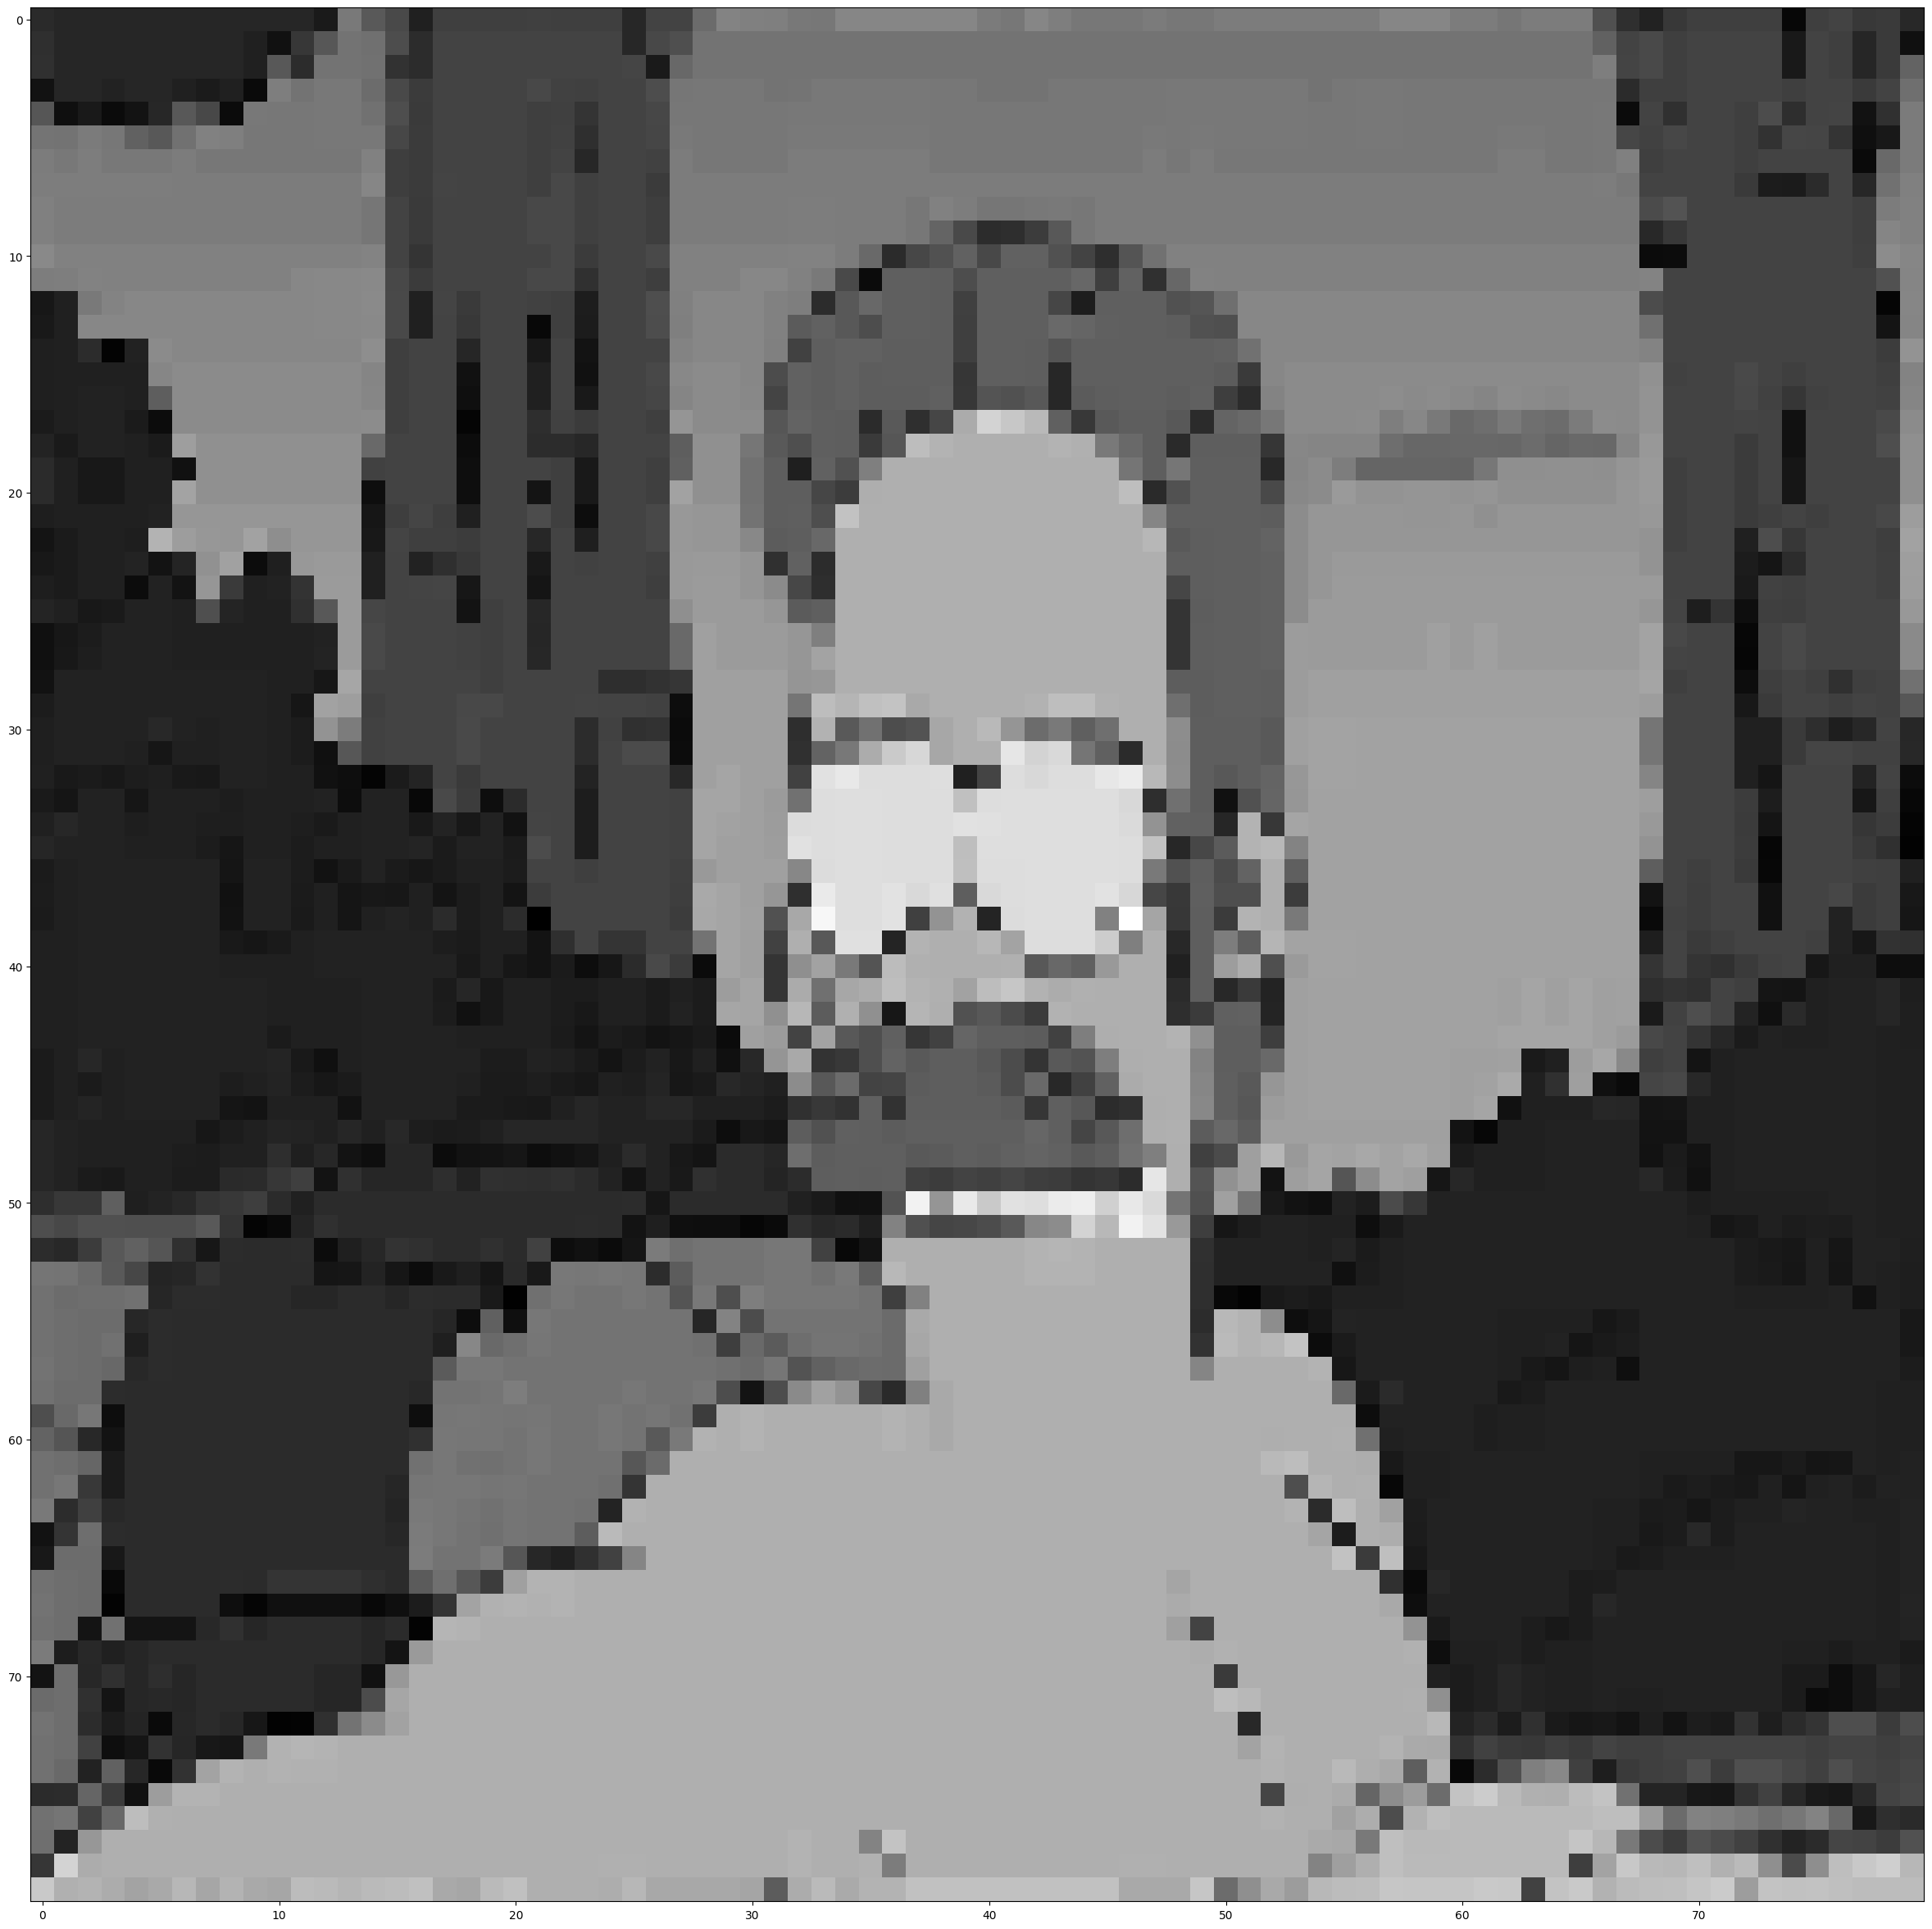

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(30,30))
plt.imshow(train[0][0],cmap='gray')
plt.show()


In [11]:
features,labels = caer.sep_train(train, IMG_SIZE = IMG_SIZE )

In [12]:
#Normalize the feature set

from tensorflow.keras.utils import to_categorical
features = caer.normalize(features)
labels = to_categorical(labels,len(characters))



In [ ]:
x_train,x_val,y_train,y_val = caer.train_val_split(features,labels,val_ratio = .2)

In [ ]:
del train
del features
del labels
gc.collect()

In [16]:
BATCH_SIZE = 32
EPOCHS = 10

In [17]:
datagen =  canaro.generators.imageDataGenerator()
train_gen = datagen.flow(x_train,y_train,batch_size = BATCH_SIZE)

In [20]:
model = canaro.models.createSimpsonsModel(IMG_SIZE=IMG_SIZE ,channels= channels,output_dim=len(characters),loss='binary_crossentropy',decay=1e-6,learning_rate=0.001,momentum=0.9,nesterov=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1752685690.710202      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1752685690.710846      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5
/usr/local/lib/python3.11/dist-packages/keras/src/optimizers/base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


ValueError: Argument(s) not recognized: {'lr': 0.001}

In [ ]:
model.summary()

In [1]:
from tensorflow.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

2025-07-17 17:18:40.062852: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752772720.254817      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752772720.311404      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


ModuleNotFoundError: No module named 'tensorflow.callbacks'

In [ ]:
training = model.fit(train_gen,
                    steps_per_epoch = len(x_train)//BATCH_SIZE,
                    epochs = EPOCHS,
                    validation_data = (x_val,y_val),
                    valdation_steps = len(y_val)//BATCH_SIZE
                    callbacks = callbacks_list)


In [2]:
characters

NameError: name 'characters' is not defined

In [ ]:
test_path = r'../input/the-simpsons-characters-dataset/simpsons_dataset/bart_simpson/pic_0010.jpg'
img = cv.imread(test_path)
plt.imshow(img , cmap = 'gray')
plt.show()

In [ ]:
def prepare(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,IMG_SIZE)
    img = caer.reshape(img,IMG_SIZE,1)
    return img

In [ ]:
predictions = model.prdict(prepare(img))

In [ ]:
print(characters[np.argmax(predictions[0])])
